In [1]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd

In [2]:
df = pd.read_csv('/home/yassine/Textra-edu/merged.csv')


In [3]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [4]:
similarity_scores = []

for i, row in df.iterrows():
    original_text = row['Original Text Chunk']
    summary = row['Summary']
    embeddings = model.encode([original_text, summary])
    similarity = util.cos_sim(embeddings[0], embeddings[1]).item()
    similarity_scores.append(similarity)

df['Semantic Similarity'] = similarity_scores   

#df.to_csv('/home/yassine/Textra-edu/summarization_with_similarity.csv', index=False)

print("Semantic similarity scores added.")

Semantic similarity scores added.


In [5]:
df.head()

,Chunk Number,Original Text Chunk,Summary,Source File,Semantic Similarity
0,1,HAL open science Open-Loop Control System for ...,This video is part of the HAL Open Science pro...,summarized_PIMM_JME_2024_HASCOET.csv,0.139586
1,2,"Javier Arduengo, Nicolas Hascoet, Francisco Ch...",Open-Loop Control System for High Precision Ex...,summarized_PIMM_JME_2024_HASCOET.csv,0.879812
2,3,HAL Id: hal-04675399 https/halsclence/hal-0467...,The Historical Archive of France (HAL) is a,summarized_PIMM_JME_2024_HASCOET.csv,0.509045
3,4,archive for the deposit and dissemination of s...,The aim of this project is to make available t...,summarized_PIMM_JME_2024_HASCOET.csv,0.514269
4,5,"Journal ofMachine Engineering, 2024, Vol. 24, ...",A new method for 3D bioprinting has been devel...,summarized_PIMM_JME_2024_HASCOET.csv,0.721535


In [6]:
def analyze_scores(csv_path, score_column): 
    df = pd.read_csv(csv_path)

    if score_column not in df.columns:
        raise ValueError(f"Column '{score_column}' not found in the csv ")
    
    score_ranges = {
        "Below 50% ": 0,
        "50% to 70%": 0,
        "Above 70%": 0
    }

    for score in df[score_column]:
        if score < 0.5:
            score_ranges["Below 50% "] += 1
        elif 0.5 <= score <= 0.7:
            score_ranges["50% to 70%"] += 1
        elif score > 0.7:
            score_ranges["Above 70%"] += 1

    print("Score Analysis :")        
    for category, count in score_ranges.items():
        print(f"{category}:{count}")

    return score_ranges    

In [7]:
analyze_scores("/home/yassine/Textra-edu/summarization_with_similarity.csv","Semantic Similarity")

Score Analysis :
Below 50% :1672
50% to 70%:899
Above 70%:607


{'Below 50% ': 1672, '50% to 70%': 899, 'Above 70%': 607}

# Compression Ratio 

In [8]:
import pandas as pd 

def calculate_compression_ratio(csv_path, output_path):

    df = pd.read_csv(csv_path)
    # Check for missing values
    print(df[['Summary', 'Original Text Chunk']].isnull().sum())

    # Fill missing values with a default string or handle them
    df['Summary'] = df['Summary'].fillna('')
    df['Original Text Chunk'] = df['Original Text Chunk'].fillna('')

    df['Compression Ratio'] = df['Summary'].str.len()/ df['Original Text Chunk'].str.len()

    #df.to_csv(output_path, index=False)
    
    print("Compression Ratio added to csv.")
    return df
    

In [9]:
df = calculate_compression_ratio(
    csv_path='/home/yassine/Textra-edu/summarization_with_similarity.csv',  # Ensure this is a valid string path
    output_path='/home/yassine/Textra-edu/summarization_with_compression.csv'
)

Summary                0
Original Text Chunk    0
dtype: int64
Compression Ratio added to csv.


In [10]:
df.head()

,Chunk Number,Original Text Chunk,Summary,Source File,Semantic Similarity,Compression Ratio
0,1,HAL open science Open-Loop Control System for ...,This video is part of the HAL Open Science pro...,summarized_PIMM_JME_2024_HASCOET.csv,0.139586,0.426230
1,2,"Javier Arduengo, Nicolas Hascoet, Francisco Ch...",Open-Loop Control System for High Precision Ex...,summarized_PIMM_JME_2024_HASCOET.csv,0.879812,0.290411
2,3,HAL Id: hal-04675399 https/halsclence/hal-0467...,The Historical Archive of France (HAL) is a,summarized_PIMM_JME_2024_HASCOET.csv,0.509045,0.265432
3,4,archive for the deposit and dissemination of s...,The aim of this project is to make available t...,summarized_PIMM_JME_2024_HASCOET.csv,0.514269,0.361656
4,5,"Journal ofMachine Engineering, 2024, Vol. 24, ...",A new method for 3D bioprinting has been devel...,summarized_PIMM_JME_2024_HASCOET.csv,0.721535,0.204000


# Coverage using KeyBERT

In [12]:
from keybert import KeyBERT

def calculate_coverage(original_text, summary):

    model = KeyBERT()
    original_keywords = [kw[0] for kw in model.extract_keywords(original_text, top_n=5)]
    summary_keywords = [kw[0] for kw in model.extract_keywords(summary, top_n=5)]
    common_keywords = set(original_keywords) & set(summary_keywords)
    return len(common_keywords) / len(original_keywords) if original_keywords else 0

def add_coverage_metric(csv_path, output_path):
    df = pd.read_csv(csv_path)
    coverage_scores = []
    for _, row in df.iterrows():
        coverage = calculate_coverage(row['Original Text Chunk'], row['Summary'])
        coverage_scores.append(coverage)
    df['Coverage'] = coverage_scores
    #df.to_csv(output_path, index=False)
    print("Coverage Metric added to CSV.")
    return df


In [13]:
df = add_coverage_metric(
        csv_path='/home/yassine/Textra-edu/summarization_with_compression.csv',
        output_path='/home/yassine/Textra-edu/summarization_with_coverage.csv'
)

Coverage Metric added to CSV.


In [14]:
df

,Chunk Number,Original Text Chunk,Summary,Source File,Semantic Similarity,Compression Ratio,Coverage
0,1,HAL open science Open-Loop Control System for ...,This video is part of the HAL Open Science pro...,summarized_PIMM_JME_2024_HASCOET.csv,0.139586,0.426230,0.0
1,2,"Javier Arduengo, Nicolas Hascoet, Francisco Ch...",Open-Loop Control System for High Precision Ex...,summarized_PIMM_JME_2024_HASCOET.csv,0.879812,0.290411,0.8
2,3,HAL Id: hal-04675399 https/halsclence/hal-0467...,The Historical Archive of France (HAL) is a,summarized_PIMM_JME_2024_HASCOET.csv,0.509045,0.265432,0.4
3,4,archive for the deposit and dissemination of s...,The aim of this project is to make available t...,summarized_PIMM_JME_2024_HASCOET.csv,0.514269,0.361656,0.0
4,5,"Journal ofMachine Engineering, 2024, Vol. 24, ...",A new method for 3D bioprinting has been devel...,summarized_PIMM_JME_2024_HASCOET.csv,0.721535,0.204000,0.4
...,...,...,...,...,...,...,...
3173,374,"linformation, puis la connaissance, c'est main...","C'est tre l'apporte de l'expertise d'tre partout,",summarized_122-SOUDOPLATOF_2018-02-16_web-1.csv,0.542804,0.126615,0.0
3174,375,Mais c'est potenticllement une très bonne nouv...,"Les médias Les, appelés",summarized_122-SOUDOPLATOF_2018-02-16_web-1.csv,0.583791,0.172932,0.2
3175,376,fondapol.tu data.fondapo % fondapol.org a J tA...,fondapol.org - fondapol.,summarized_122-SOUDOPLATOF_2018-02-16_web-1.csv,0.650372,0.444444,0.2
3176,377,"unevoix Ipérae,progressiste: ete européenne AN...",Une tte tte,summarized_122-SOUDOPLATOF_2018-02-16_web-1.csv,0.441566,0.103774,0.0


# Criterias for good summaries 

Semantic Similarity:
    High similarity scores (e.g., above 0.7) indicate that the summary retains the essence of the original text.

Compression Ratio:
    Ideal values are typically between 0.2 and 0.4 for a concise but informative summary.
    
Coverage:
    Higher coverage values (e.g., above 0.5) suggest that key concepts are captured.

In [1]:
import pandas as pd 

df = pd.read_csv('/home/yassine/Textra-edu/summarization_with_coverage.csv')

similarity_threshold = 0.7
compression_lower = 0.2 
compression_upper = 0.4
coverage_threshold = 0.5 

good_summaries = df[
    (df['Semantic Similarity'] >= similarity_threshold) &
    (df['Compression Ratio'] >= compression_lower) &
    (df['Compression Ratio'] <= compression_upper) &
    (df['Coverage'] >= coverage_threshold)
]

good_summaries.to_csv('/home/yassine/Textra-edu/good_summaries_filtered.csv', index=False)
print(f"Filtered {len(good_summaries)} good summaries.")


Filtered 190 good summaries.


In [2]:
print(good_summaries[['Semantic Similarity', 'Compression Ratio', 'Coverage']].describe())


       Semantic Similarity  Compression Ratio    Coverage
count           190.000000         190.000000  190.000000
mean              0.800794           0.285816    0.671053
std               0.058981           0.054057    0.111881
min               0.700943           0.200000    0.600000
25%               0.753762           0.238722    0.600000
50%               0.796014           0.282766    0.600000
75%               0.853474           0.330686    0.800000
max               0.923877           0.397297    1.000000


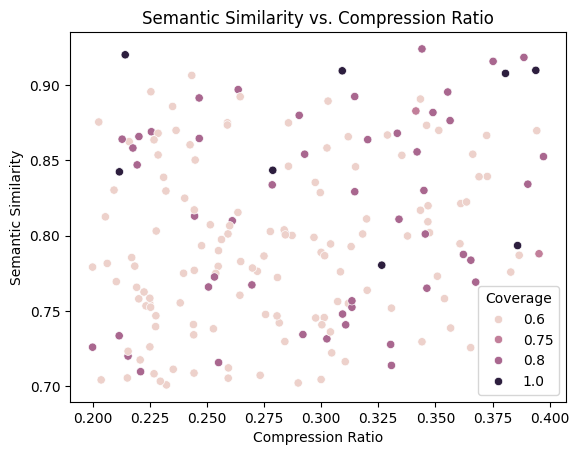

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Semantic Similarity vs. Compression Ratio
sns.scatterplot(data=good_summaries, x='Compression Ratio', y='Semantic Similarity', hue='Coverage')
plt.title('Semantic Similarity vs. Compression Ratio')
plt.show()





High Semantic Similarity (above 0.7).

Moderate Compression Ratio (e.g., 0.2–0.4).

High Coverage (e.g., hue indicating values > 0.5).

These are likely our best summaries.